In [23]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from profanity import profanity
from collections import Counter

In [24]:
# Dictionary that holds counts for words and unique words in every song

lyrics = defaultdict(dict)

words_per_song = defaultdict(dict)
unique_words_per_song = defaultdict(dict)

# Dictionary that holds counts for words per album
words_per_album = defaultdict(int)
unique_words_per_album = defaultdict(int)

# Dictionary that keeps track of the average number of words in a song per album
average_words_per_album = defaultdict(int)

# Dictionary that holds the number of songs per album
num_songs = {}

# Dictionary that holds the most used words in an album
album_most_used_words = defaultdict(list[str])

# Dictionary that holds the most used words in entire discography (to be plotted over albums and see how use changes)
most_used_words = list

all_words_in_album = defaultdict(str)

# Iterates over all of the directories
for root, dirs, files in os.walk('songs_excl_ftv', topdown=True):

    for dir in dirs:
        for file in os.listdir(os.path.join("songs_excl_ftv/", dir)):
            title = os.path.join(f"songs_excl_ftv/{dir}", file)
            words = []
            with open(title) as t:
                word_list = []
                for line in t.readlines():
                    word_list.append(line.rstrip())
                lyrics[dir][os.path.basename(title)] = word_list
        


In [25]:
# List that holds all of the words in every song
all_words = []

swear_count = 0

swear_dictionary = {}

for album, song in lyrics.items():

    # List that holds all of the words in a given album
    album_words = []

    # Saves the number of songs per album
    song_num = len(song.values())
    num_songs[album] = song_num

    # Set that saves the unique words in an album
    unique_words = set()

    # list which will store the most frequently appearing words across an album
    album_most_freq = defaultdict(int)

    for title, word_list in song.items():

        # Saves the number of words and unique words per song
        total_sum = len(word_list)
        unique_sum = len(set(word_list))
        words_per_song[album][title] = total_sum
        unique_words_per_song[album][title] = unique_sum

        profanity_bool = profanity.contains_profanity(" ".join(word_list))
        if profanity_bool:
            swear_count += 1

        
        for word in word_list:
            album_words.append(word)
            all_words.append(word)

            # Updates the word count of a word in an album
            words_per_album[album] += 1
            unique_words.add(word)
        
        unique_words_per_album[album] = len(unique_words)

    all_words_in_album[album] = " ".join(album_words)

    swear_dictionary[album] = swear_count/num_songs[album]

for album, sum in words_per_album.items():

    # saves the average number of words per song per album
    avg_per_album = sum/num_songs[album]
    average_words_per_album[album] = avg_per_album

In [26]:
print(num_songs)

{'Lover': 19, "Red (Taylor's Version)": 20, "1989 (Taylor's Version)": 17, "Speak Now (Taylor's Version)": 16, 'evermore': 17, 'reputation': 15, 'Midnights': 22, "Fearless (Taylor's Version)": 20, 'The Tortured Poets Department': 31, 'Taylor Swift': 14, 'folklore': 17}


In [27]:
color = ['#008080', '#D7B575', '#774F8F', '#921D16', '#5585AC', '#202020', '#df6cab', '#05472A', '#B05925', '#4B5A86', '#BDAE95']

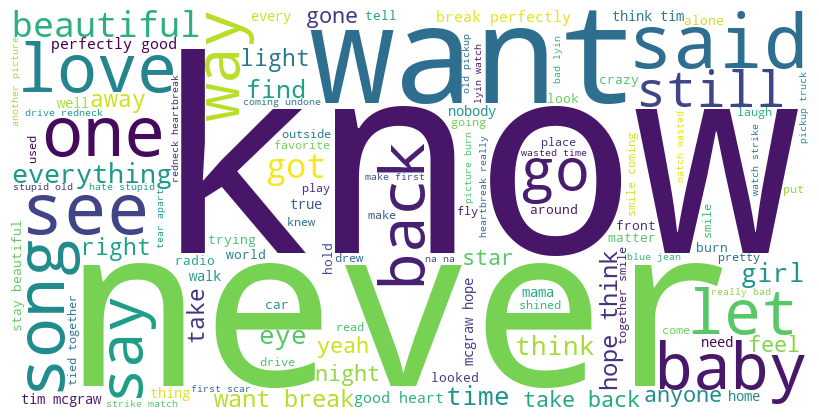

In [28]:
debut_counts = all_words_in_album['Taylor Swift']

debut_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(debut_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(debut_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

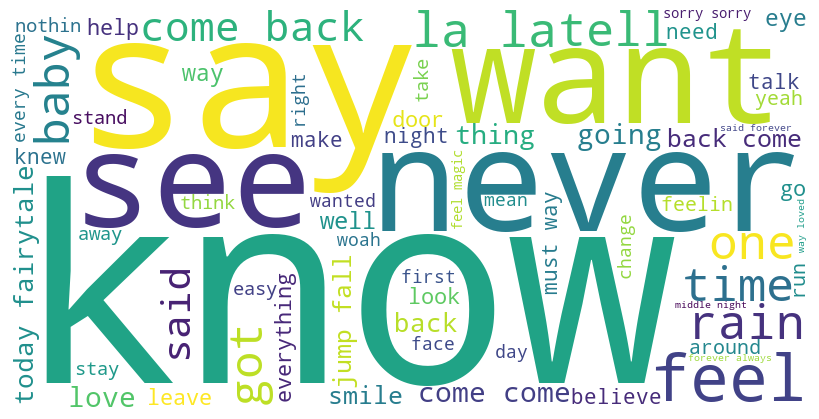

In [29]:
fearless_counts = all_words_in_album["Fearless (Taylor's Version)"]

debut_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(fearless_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(debut_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

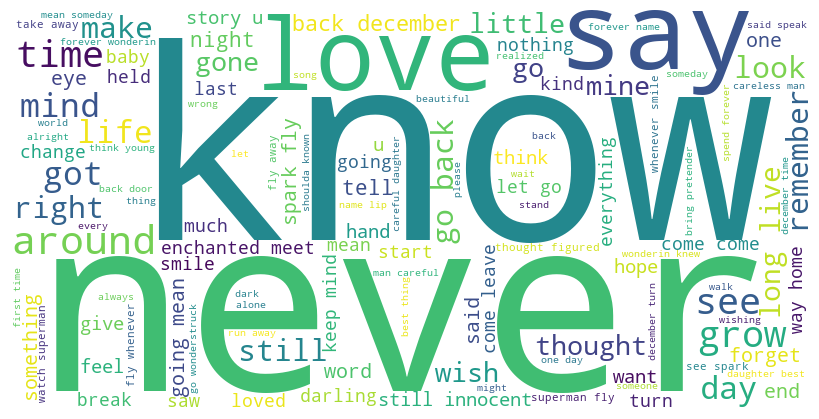

In [30]:
speak_now_counts = all_words_in_album["Speak Now (Taylor's Version)"]

debut_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(speak_now_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(debut_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

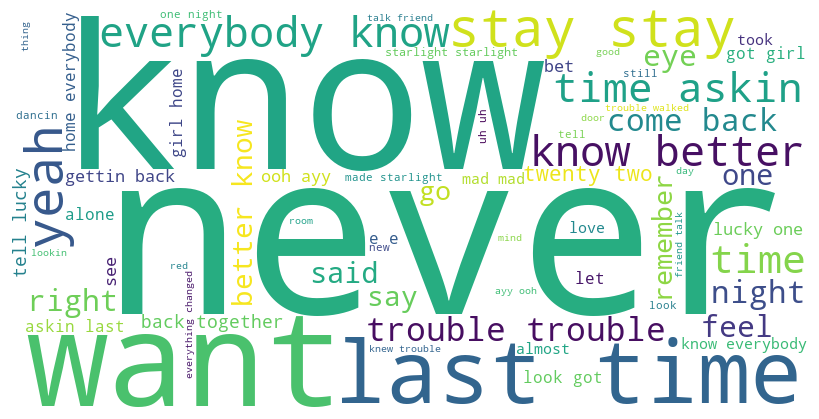

In [31]:
red_counts = all_words_in_album["Red (Taylor's Version)"]

debut_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(red_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(debut_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Counter({'shake': 70, 'love': 64, 'yet': 57, 'got': 56, 'wish': 48, 'like': 44, 'new': 44, 'baby': 43, 'back': 43, 'say': 41, 'go': 39, 'never': 38, 'could': 36, 'know': 33, 'clear': 33, 'wood': 32, 'would': 31, 'going': 29, 'welcome': 29, 'york': 29, 'girl': 26, 'come': 25, 'want': 25, 'good': 24, 'bad': 23, 'think': 22, 'play': 19, 'u': 19, 'forever': 19, 'light': 19, 'see': 18, 'wonderland': 18, 'take': 17, 'look': 17, 'right': 17, 'hate': 16, 'remember': 16, 'time': 16, 'blood': 16, 'break': 15, 'fake': 15, 'let': 15, 'hand': 15, 'life': 15, 'get': 14, 'last': 14, 'way': 14, 'home': 14, 'tell': 14, 'long': 14, 'came': 14, 'one': 13, 'dream': 13, 'knew': 13, 'lost': 13, 'eye': 13, 'gone': 13, 'every': 13, 'finally': 13, 'people': 12, 'mad': 12, 'make': 11, 'night': 11, 'place': 11, 'found': 11, 'work': 11, 'ever': 11, 'made': 11, 'clean': 11, 'yeah': 10, 'free': 10, 'i-i-i-i': 10, 'sweeter': 10, 'style': 10, 'lip': 9, 'wildest': 9, 'ah': 9, 'leave': 9, 'hear': 9, 'silence': 9, 'thin

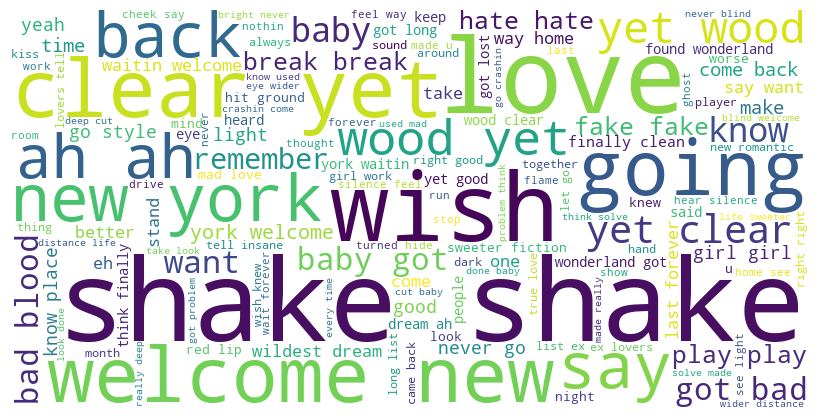

In [45]:
eighty_nine_counts = all_words_in_album["1989 (Taylor's Version)"]

counter = Counter(eighty_nine_counts.split())
print(counter)

debut_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(eighty_nine_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(debut_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

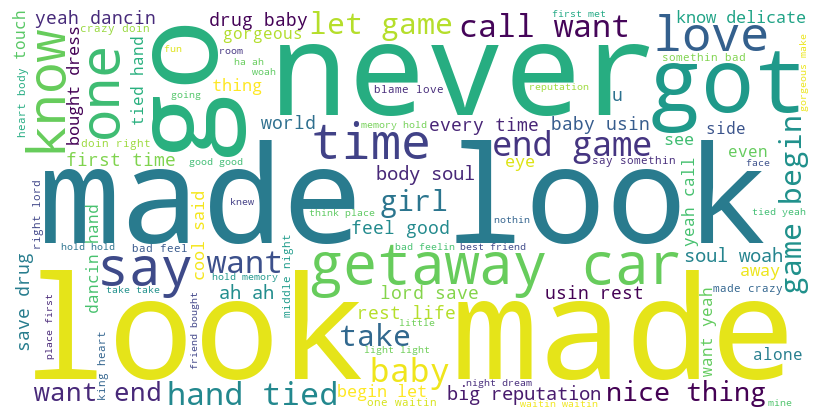

In [33]:
rep_counts = all_words_in_album["reputation"]

rep_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(rep_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(rep_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

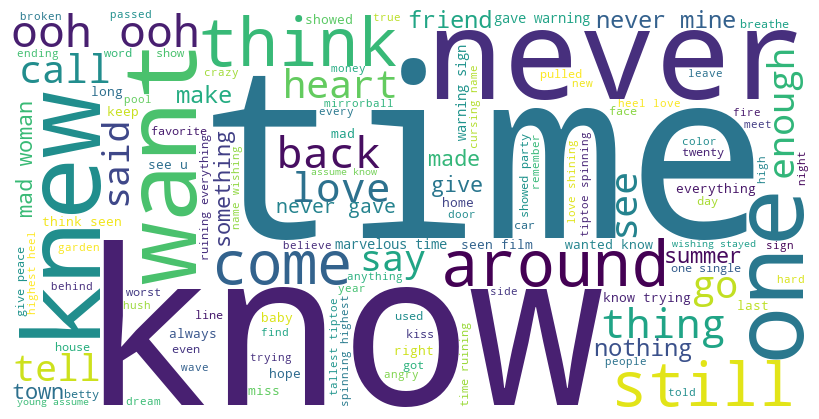

In [34]:
folklore_counts = all_words_in_album["folklore"]

folklore_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(folklore_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(folklore_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

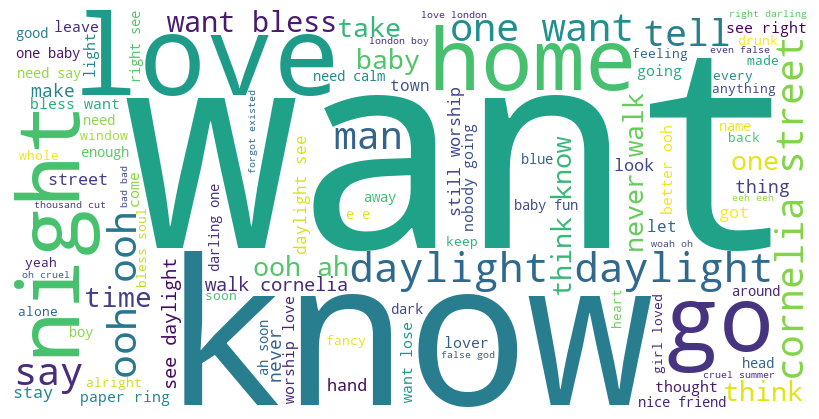

In [35]:
lover_counts = all_words_in_album["Lover"]

lover_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(lover_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(lover_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

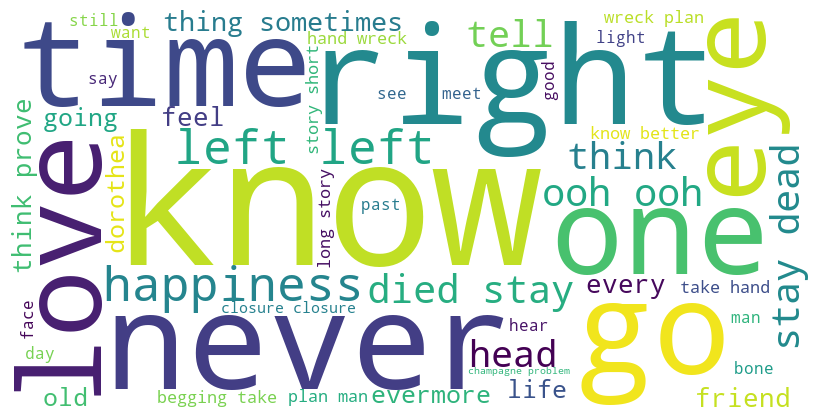

In [36]:
evermore_counts = all_words_in_album["evermore"]

evermore_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(evermore_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(evermore_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

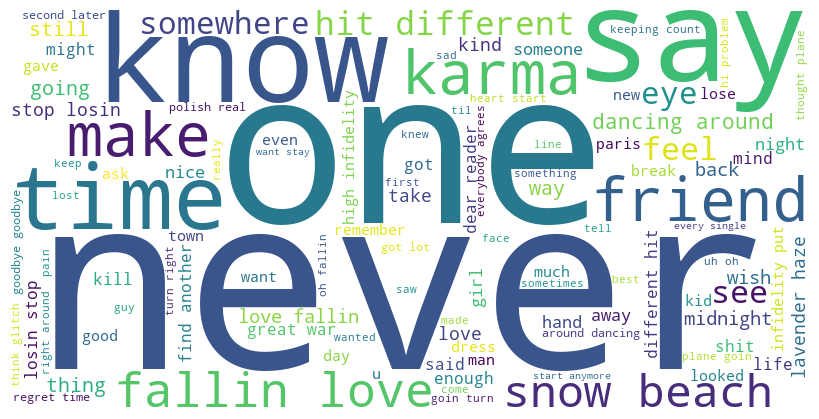

In [37]:
midnights_counts = all_words_in_album["Midnights"]

midnights_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(midnights_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(midnights_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

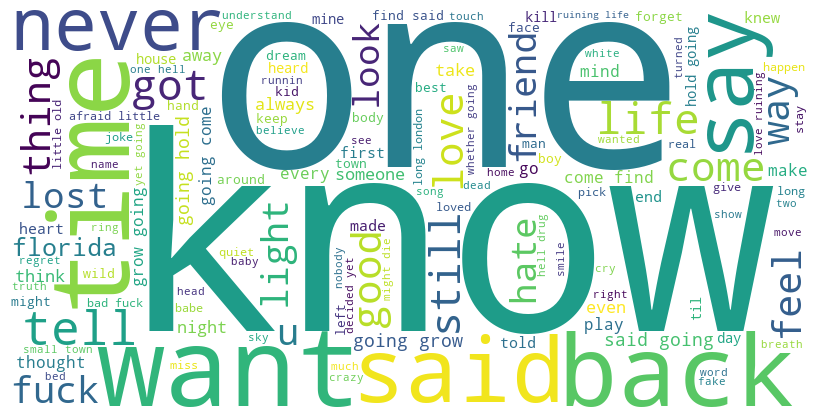

In [38]:
poets_counts = all_words_in_album["The Tortured Poets Department"]

poets_cloud = WordCloud(
    width = 800,
    height = 400,
    background_color='white',
    min_font_size=10
).generate(poets_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(poets_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [39]:
albums = ["Taylor Swift", "Fearless (Taylor's Version)", "Speak Now (Taylor's Version)", 
          "Red (Taylor's Version)", "1989 (Taylor's Version)", "reputation", "Lover", 
          "folklore", "evermore", "Midnights", "The Tortured Poets Department"]

shortenings = ["Debut", "Fearless", "Speak Now", 
          "Red", "1989", "rep", "Lover", 
          "folklore", "evermore", "Midnights", "TTPD"]

Text(0, 0.5, 'Number of Songs')

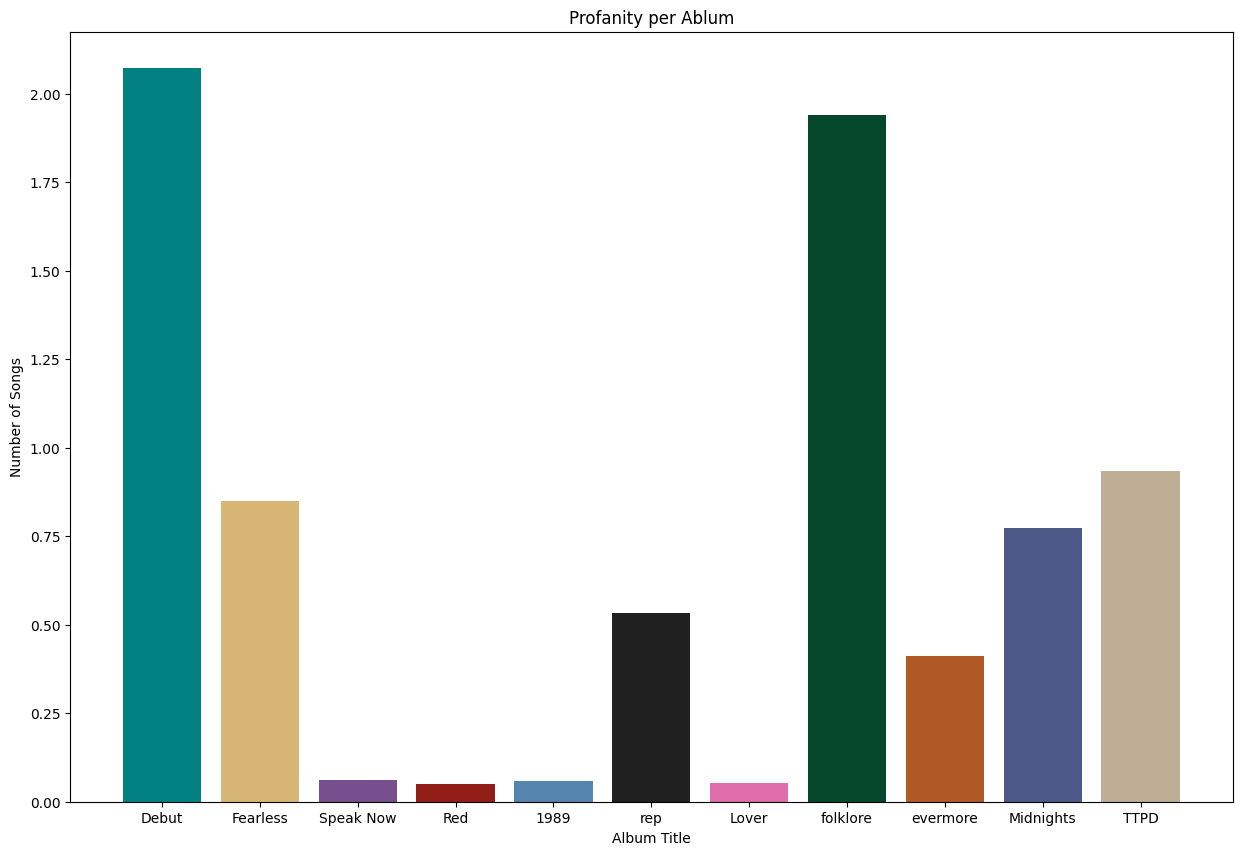

In [40]:
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], swear_dictionary[album], color=color[i])

plt.title("Profanity per Ablum")
plt.xlabel("Album Title")
plt.ylabel("Number of Songs")

Text(0, 0.5, 'Number of Songs')

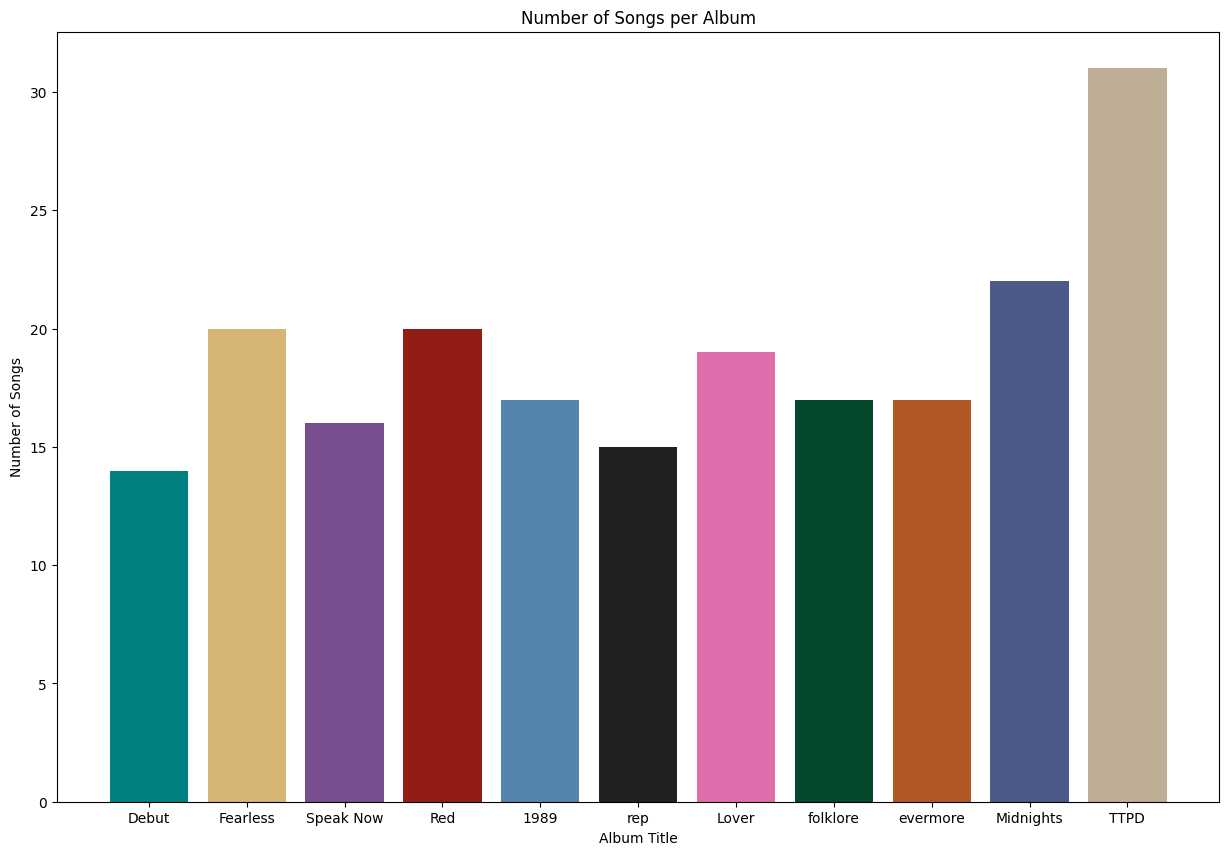

In [41]:
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], num_songs[album], color=color[i])

plt.title("Number of Songs per Album")
plt.xlabel("Album Title")
plt.ylabel("Number of Songs")


Text(0, 0.5, 'Number of Words')

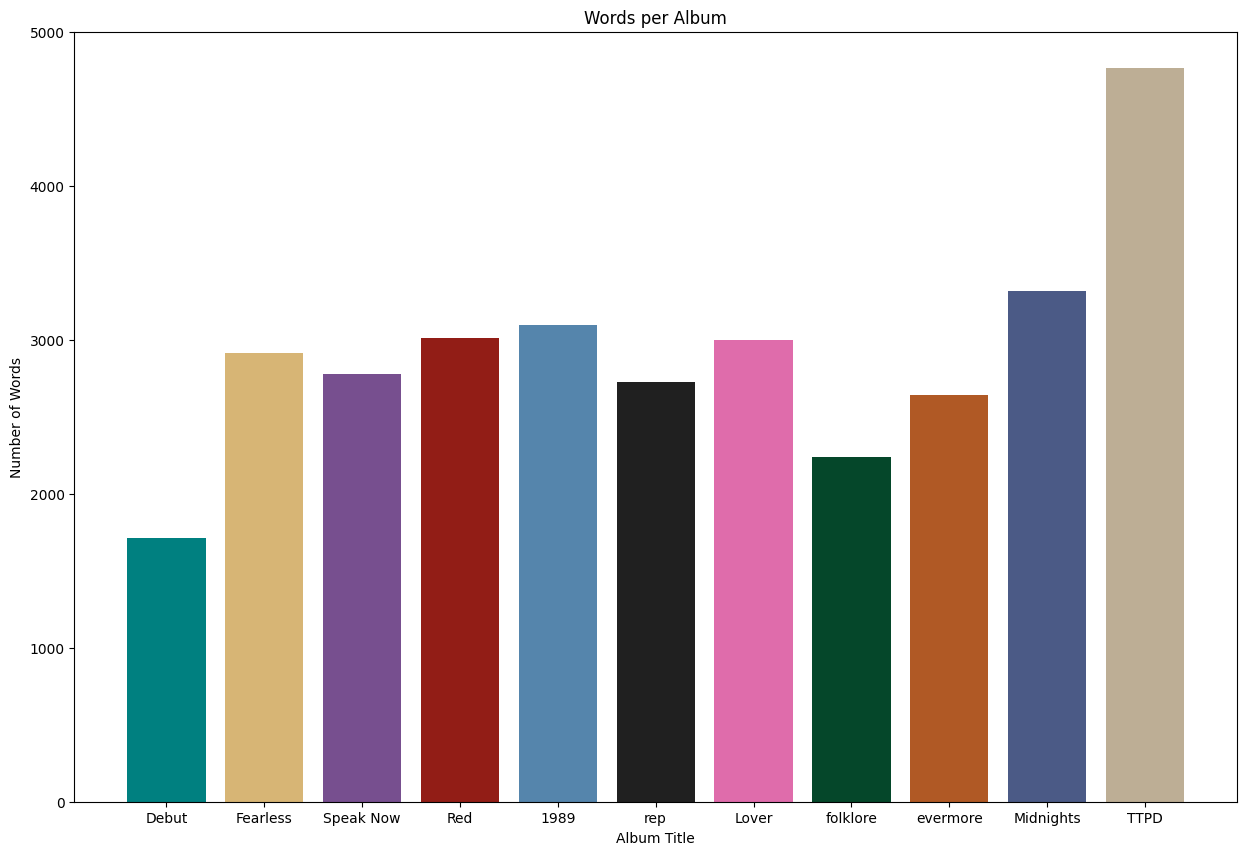

In [42]:
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], words_per_album[album], color=color[i])

plt.title("Words per Album")
plt.xlabel("Album Title")
plt.ylabel("Number of Words")

Text(0, 0.5, 'Unique Words')

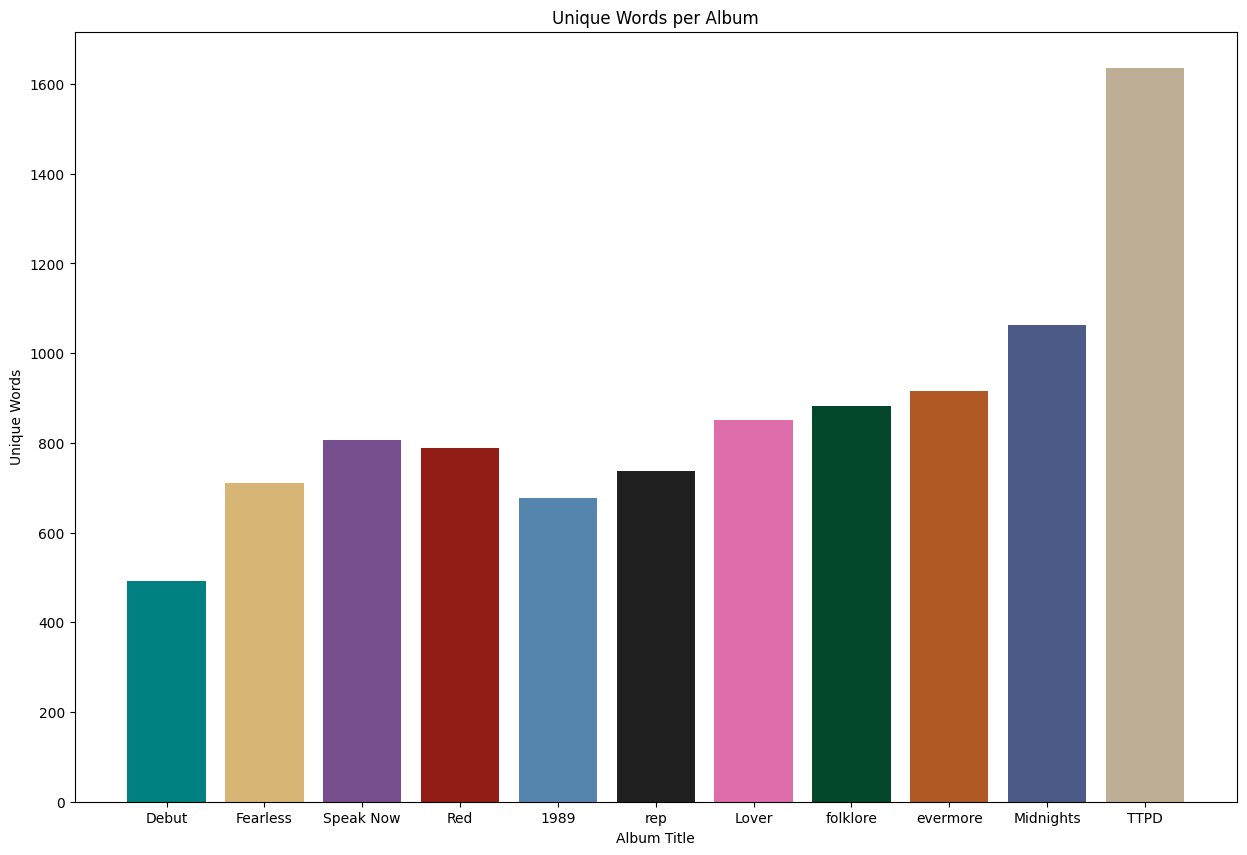

In [43]:
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], unique_words_per_album[album], color=color[i])

plt.title("Unique Words per Album")
plt.xlabel("Album Title")
plt.ylabel("Unique Words")

Text(0, 0.5, 'Number of  Words')

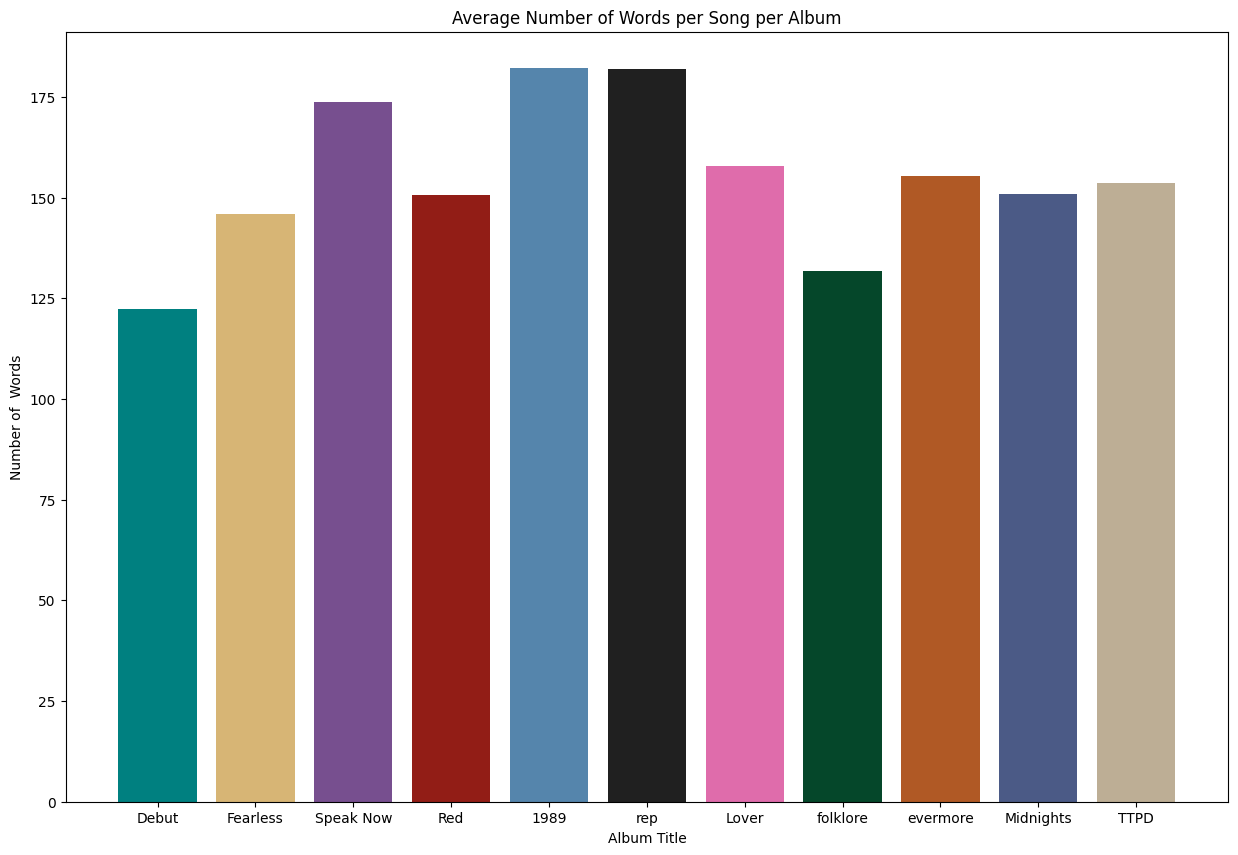

In [44]:
plt.figure(figsize=(15, 10))

for i, album in enumerate(albums):
    plt.bar(shortenings[i], average_words_per_album[album], color=color[i])

plt.title("Average Number of Words per Song per Album")
plt.xlabel("Album Title")
plt.ylabel("Number of  Words")